<h3 style="color:red;">Preterm neonate of 31 weeks of gestation and 1.5 kg at 48 hours</h3>


In [74]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

# scale the model to a premature neonate of 31 weeks and 1.5 kg (p50 Fenton growth charts) and recalculate 120 seconds
model._scaling.res_factor_circ_correction = 0.8
model._scaling.el_min_factor_correction = 1.0
model._scaling.el_max_factor_correction = 0.9

model._scaling.scale_patient(
    target_weight=1.5,
    target_height=0.406,
    target_blood_volume=0.08,
    target_hr_ref=160,
    target_map=45.45,
)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 8.2 sec. Average model step in 0.0340 ms.
 Ready in 8.0 sec. Average model step in 0.0335 ms.


<h5 style="color:red;">Model run results</h5>

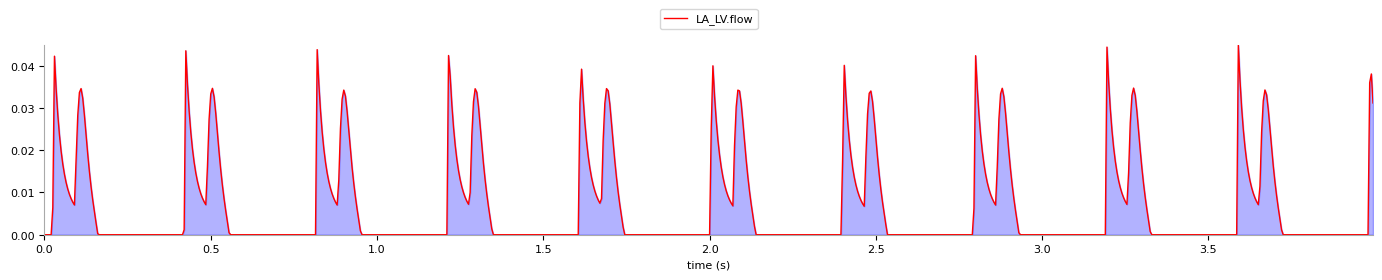

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  387.20843, forward  387.20843, backward        0.0 ml/min, stroke volume:    2.55351 ml, 


In [75]:
neo.plot_time_graph(["LA_LV.flow"], time_to_calculate=4)

In [76]:
# get the pressures, flows and volumes from a 60 second model run.
neo.validate()

Heart.heart_rate: max  151.95895 min  151.62361
AA.pres         : max   60.67496, min   37.42701 mmHg
LA_LV.flow      : net    255.269, forward    255.269, backward        0.0 ml/kg/min, stroke volume:    1.67939 ml/kg, 
RA_RV.flow      : net  251.21423, forward  251.21423, backward        0.0 ml/kg/min, stroke volume:    1.65271 ml/kg, 
SVC_RA.flow     : net  110.24575, forward  116.02978, backward   -5.78403 ml/kg/min, stroke volume:    0.72529 ml/kg, 
AAR_AD.flow     : net  142.30418, forward  144.57774, backward   -2.27356 ml/kg/min, stroke volume:     0.9362 ml/kg, 
LV.vol          : max    2.45706, min     0.7487 ml/kg


<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="450"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="450"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [3]:
# get additional model data, heartrate and resp_rate in beats and breaths per minute, pressures in mmHg, po2 and pco2 in kPa, hco3 and base excess (be) in mmol/l
neo.get_vitals()

{'heartrate': 142.30712361914297,
 'spo2_pre': 96.23693304629676,
 'spo2_post': 95.7604047326368,
 'abp_systole': 60.94196,
 'abp_diastole': 36.5827,
 'pap_systole': 36.0852,
 'pap_diastole': 14.79928,
 'cvp': 2.286990083,
 'resp_rate': 42.17967500984515,
 'pH': 7.395187352183834,
 'po2': 10.179583504080123,
 'pco2': 5.72196788644237,
 'hco3': 25.97863899892441,
 'be': 0.614471574992734}

In [70]:
neo.get_total_blood_volume()

Total blood volume: 74.99999999999964 ml/kg = 100.0%
Systemic blood volume: 67.05550254566289 ml/kg = 89.40733672755094%
Pulmonary total blood volume: 7.9444974543367595 ml/kg = 10.592663272449062%
Pulmonary capillary blood volume: 3.0579968465651466 ml/kg = 38.49201115793474% of total pulmonary blood volume
Heart blood volume: 6.033755465503709 ml/kg = 8.045007287338315%
Capillary blood volume: 3.679121825944246 ml/kg = 4.905495767925684%
Venous blood volume: 47.38874086767678 ml/kg = 63.18498782356934%
Arterial blood volume: 9.901948288215616 ml/kg = 13.20259771762088%
Upper body blood volume: 21.040867673387677 ml/kg = 28.0544902311837%
Lower body blood volume: 39.92894330844897 ml/kg = 53.238591077932206%


0.11249999999999948